In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('DIA_Form.csv')
data.columns = ['Date', 'Age', 'Sex', 'AW', 'WS0', 'WS10', 'WS20', 'WS50']
print(data.head())

                  Date  Age      Sex  AW WS0 WS10 WS20 WS50
0  26/03/2021 21.50.20   23  Maschio  Sì  No   Sì  NaN  NaN
1  26/03/2021 21.50.46   23  Femmina  No  No   No   No   No
2  26/03/2021 21.50.50   23  Maschio  Sì  No   No   Sì  NaN
3  26/03/2021 21.50.58   23  Femmina  Sì  No   No   No   Sì
4  26/03/2021 21.55.34   24  Femmina  No  No   Sì  NaN  NaN


In [37]:
# Number of people who submitted the form
N = len(data.Date)
print("Number of submissions:", N)

Number of submissions: 1004


### Classes
* Class1: Females under 35
* Class2: Males under 35
* Class3: Females over 35
* Class4: Males over 35

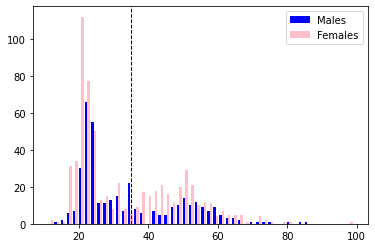

In [5]:
AgeM = data.Age[data.Sex == 'Maschio']
AgeF = data.Age[data.Sex == 'Femmina']

bins = 50
plt.hist([AgeM, AgeF], bins, label=['Males', 'Females'], color=['Blue', 'Pink'])
plt.legend(loc='upper right')
plt.axvline(35, color='k', linestyle='dashed', linewidth=1)
plt.show()

In [35]:
# Form submissions divided by class
c1 = data[(data.Sex == 'Femmina') & (data.Age <= 35)]
c2 = data[(data.Sex == 'Maschio') & (data.Age <= 35)]
c3 = data[(data.Sex == 'Femmina') & (data.Age > 35)]
c4 = data[(data.Sex == 'Maschio') & (data.Age > 35)]

# Number of people who submitted the form, divided by class
N1 = len(c1.Date)
N2 = len(c2.Date)
N3 = len(c3.Date)
N4 = len(c4.Date)

print("Number of submissions divided by class: ", [N1, N2, N3, N4])

Number of submissions divided by class:  [380, 246, 247, 131]


### Probabilities computation
Remember that the number of people and the probabilities related to item 2 are computed considering all the people who submitted the form, so also the ones who did not technically buy item 1. This is because, to answer the question about item 2 in the form, we told the potential customers to assume they already bought item 1.

In [16]:
# Number of people per class that buy (at least) item 1
nc1_i1 = c1.Date[c1.AW == 'Sì'].count()
nc2_i1 = c2.Date[c2.AW == 'Sì'].count()
nc3_i1 = c3.Date[c3.AW == 'Sì'].count()
nc4_i1 = c4.Date[c4.AW == 'Sì'].count()

# P(buy item 1) = i1
c1_i1 = nc1_i1 / N1
c2_i1 = nc2_i1 / N2
c3_i1 = nc3_i1 / N3
c4_i1 = nc4_i1 / N4

print("P(buy item 1) = ", [c1_i1, c2_i1, c3_i1, c4_i1])

P(buy item 1) =  [0.49736842105263157, 0.3617886178861789, 0.44534412955465585, 0.37404580152671757]


In [17]:
# Number of people per class that buy item 2 (or, equivalently, buy item 2 after buying item 1 and getting promo P0)
nc1_i2_p0 = c1.Date[c1.WS0 == 'Sì'].count()
nc2_i2_p0 = c2.Date[c2.WS0 == 'Sì'].count()
nc3_i2_p0 = c3.Date[c3.WS0 == 'Sì'].count()
nc4_i2_p0 = c4.Date[c4.WS0 == 'Sì'].count()

# P(buy item 2) = P(buy item 2 + P0) = i2_p0
c1_i2_p0 = (nc1_i2_p0) / N1
c2_i2_p0 = (nc2_i2_p0) / N2
c3_i2_p0 = (nc3_i2_p0) / N3
c4_i2_p0 = (nc4_i2_p0) / N4

print("P(buy item 2) = P(buy item 2 + P0) = ", [c1_i2_p0, c2_i2_p0, c3_i2_p0, c4_i2_p0])

P(buy item 2) = P(buy item 2 + P0) =  [0.3473684210526316, 0.2073170731707317, 0.24696356275303644, 0.17557251908396945]


In [20]:
# Number of people per class that buy item 2 after buying item 1 and getting promo P1
nc1_i2_p1 = c1.Date[c1.WS10 == 'Sì'].count()
nc2_i2_p1 = c2.Date[c2.WS10 == 'Sì'].count()
nc3_i2_p1 = c3.Date[c3.WS10 == 'Sì'].count()
nc4_i2_p1 = c4.Date[c4.WS10 == 'Sì'].count()

# P(buy item 2 + P1) = i2_p1
c1_i2_p1 = (nc1_i2_p1 + nc1_i2_p0 ) / N1
c2_i2_p1 = (nc2_i2_p1 + nc2_i2_p0) / N2
c3_i2_p1 = (nc3_i2_p1 + nc3_i2_p0) / N3
c4_i2_p1 = (nc4_i2_p1 + nc4_i2_p0) / N4

print("P(buy item 2) = P(buy item 2 + P1) = ", [c1_i2_p1, c2_i2_p1, c3_i2_p1, c4_i2_p1])

P(buy item 2) = P(buy item 2 + P1) =  [0.3973684210526316, 0.24796747967479674, 0.291497975708502, 0.1984732824427481]


In [21]:
# Number of people per class that buy item 2 after buying item 1 and getting promo P2
nc1_i2_p2 = c1.Date[c1.WS20 == 'Sì'].count()
nc2_i2_p2 = c2.Date[c2.WS20 == 'Sì'].count()
nc3_i2_p2 = c3.Date[c3.WS20 == 'Sì'].count()
nc4_i2_p2 = c4.Date[c4.WS20 == 'Sì'].count()

# P(buy item 2 + P2) = i2_p2
c1_i2_p2 = (nc1_i2_p2 + nc1_i2_p1 + nc1_i2_p0) / N1
c2_i2_p2 = (nc2_i2_p2 + nc2_i2_p1 + nc2_i2_p0) / N2
c3_i2_p2 = (nc3_i2_p2 + nc3_i2_p1 + nc3_i2_p0) / N3
c4_i2_p2 = (nc4_i2_p2 + nc4_i2_p1 + nc4_i2_p0) / N4

print("P(buy item 2) = P(buy item 2 + P2) = ", [c1_i2_p2, c2_i2_p2, c3_i2_p2, c4_i2_p2])

P(buy item 2) = P(buy item 2 + P2) =  [0.4421052631578947, 0.2764227642276423, 0.31983805668016196, 0.22137404580152673]


In [22]:
# Number of people per class that buy item 2 after buying item 1 and getting promo P3
nc1_i2_p3 = c1.Date[c1.WS50 == 'Sì'].count()
nc2_i2_p3 = c2.Date[c2.WS50 == 'Sì'].count()
nc3_i2_p3 = c3.Date[c3.WS50 == 'Sì'].count()
nc4_i2_p3 = c4.Date[c4.WS50 == 'Sì'].count()

# P(buy item 2 + P3) = i2_p3
c1_i2_p3 = (nc1_i2_p3 + nc1_i2_p2 + nc1_i2_p1 + nc1_i2_p0) / N1
c2_i2_p3 = (nc2_i2_p3 + nc2_i2_p2 + nc2_i2_p1 + nc2_i2_p0) / N2
c3_i2_p3 = (nc3_i2_p3 + nc3_i2_p2 + nc3_i2_p1 + nc3_i2_p0) / N3
c4_i2_p3 = (nc4_i2_p3 + nc4_i2_p2 + nc4_i2_p1 + nc4_i2_p0) / N4

print("P(buy item 2) = P(buy item 2 + P3) = ", [c1_i2_p3, c2_i2_p3, c3_i2_p3, c4_i2_p3])

P(buy item 2) = P(buy item 2 + P3) =  [0.7578947368421053, 0.5934959349593496, 0.6072874493927125, 0.44274809160305345]


### Resulting data structures

In [23]:
# Array containing the number of customers per class [c1, c2, c3, c4]
customers = np.array([N1, N2, N3, N4])
customers

array([380, 246, 247, 131])

In [27]:
# Probabilities to buy item 1, divided by class
prob_buy_item1 = np.array([c1_i1, c2_i1, c3_i1, c4_i1])
prob_buy_item1

array([0.49736842, 0.36178862, 0.44534413, 0.3740458 ])

In [30]:
# Probabilities to buy item 2 given each promo, divided by class
prob_buy_item2 = np.array([[c1_i2_p0, c2_i2_p0, c3_i2_p0, c4_i2_p0],
                           [c1_i2_p1, c2_i2_p1, c3_i2_p1, c4_i2_p1],
                           [c1_i2_p2, c2_i2_p2, c3_i2_p2, c4_i2_p2],
                           [c1_i2_p3, c2_i2_p3, c3_i2_p3, c4_i2_p3]])

prob_buy_item2_df = pd.DataFrame(data=prob_buy_item2,
                                 index=["P0", "P1", "P2", "P3"],
                                 columns=["Class1", "Class2", "Class3", "Class4"])

prob_buy_item2_df

,Class1,Class2,Class3,Class4
P0,0.347368,0.207317,0.246964,0.175573
P1,0.397368,0.247967,0.291498,0.198473
P2,0.442105,0.276423,0.319838,0.221374
P3,0.757895,0.593496,0.607287,0.442748


In [34]:
# Number of people that buy item 2 given each promo, divided by class
n_buy_item2 = np.array([[nc1_i2_p0, nc2_i2_p0, nc3_i2_p0, nc4_i2_p0],
                        [nc1_i2_p1, nc2_i2_p1, nc3_i2_p1, nc4_i2_p1],
                        [nc1_i2_p2, nc2_i2_p2, nc3_i2_p2, nc4_i2_p2],
                        [nc1_i2_p3, nc2_i2_p3, nc3_i2_p3, nc4_i2_p3]])

n_buy_item2_df = pd.DataFrame(data=n_buy_item2,
                              index=["P0", "P1", "P2", "P3"],
                              columns=["Class1", "Class2", "Class3", "Class4"])

n_buy_item2_df

# To check that che sum are correct
#np.sum(n_buy_item2) + data.Date[data.WS50 == "No"].count() == data.Date.count()

,Class1,Class2,Class3,Class4
P0,132,51,61,23
P1,19,10,11,3
P2,17,7,7,3
P3,120,78,71,29
